In [203]:
"""
              AUTHOR : GAUTAM CHANDRA SAHA
              DATE & TIME: Mon, October 31,2022 AT 19:23 
              DESCRIPTION:
    
"""
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Classifiers:
    knc = ""
    dt = ""
    nbg = ""
    svm = ""

  
class Vars:
    x = []
    y = []

class Data:
    df  =  Vars()    
    rand = dict
    train = Vars()
    test = Vars()
    classifier = Classifiers()
    model = Classifiers()
    pred = Classifiers()
    scores = Classifiers()
    


In [50]:
df_bill = pd.read_csv('bill_authentication.csv')
df_social = pd.read_csv('Social_Network_Ads.csv')
print(f"{df_bill.shape=}")
print(f"{df_social.shape=}")

df_bill.shape=(1372, 5)
df_social.shape=(400, 5)


In [205]:
social = Data()
bill = Data()
random_states = [0,5,10]
test_sizes = [0.25,0.30]

bill.df.x =  df_bill.drop('Class',axis=1)
bill.df.y = df_bill['Class']

social.df.x =  df_social.drop('Gender',axis=1)
social.df.y = df_social['Gender']



In [206]:
from sklearn.model_selection import train_test_split as tts


bill.rand = {
         random_state : [ tts (bill.df.x, bill.df.y, test_size = test_size, random_state=random_state) 
         for test_size in test_sizes] 
         for random_state in random_states }



data = {
        random_state :  [{ 
                'x_train': bill.rand[random_state][item][0] ,
                'x_test': bill.rand[random_state][item][1] ,
                'y_train': bill.rand[random_state][item][2] ,
                'y_test': bill.rand[random_state][item][3] }
                
                for item in [0,1]
                ]

         for random_state in random_states}




In [212]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.svm import SVC

#* for KNC

bill.classifier.knc = KNC(n_neighbors=5)

bill.model.knc = {
    rs : [bill.classifier.knc.fit(
        X=data[rs][i]['x_train'],y=data[rs][i]['y_train'])
        for i in [0,1]]
    for rs in random_states
}

# [rs][i]['x_test']
bill.pred.knc ={
    rs : [bill.model.knc[rs][i].predict(data[rs][i]['x_test'])
        for i in [0,1]]
    for rs in random_states
}

#* for DTC
bill.classifier.dt = DTC()
bill.model.dt = {
    rs : [bill.classifier.dt.fit(
        X=data[rs][i]['x_train'],y=data[rs][i]['y_train'])
        for i in [0,1]]
    for rs in random_states
}

bill.pred.dt ={
    rs : [bill.model.dt[rs][i].predict(data[rs][i]['x_test'])
        for i in [0,1]]
    for rs in random_states
}


#* for GNB

bill.classifier.nbg = GNB()

bill.model.nbg = {
    rs : [bill.classifier.nbg.fit(
        X=data[rs][i]['x_train'],y=data[rs][i]['y_train'])
        for i in [0,1]]
    for rs in random_states
}

# [rs][i]['x_test']
bill.pred.nbg ={
    rs : [bill.model.nbg[rs][i].predict(data[rs][i]['x_test'])
        for i in [0,1]]
    for rs in random_states
}

#* for SVC
bill.classifier.svm = SVC()

bill.model.svm = {
    rs : [bill.classifier.svm.fit(
        X=data[rs][i]['x_train'],y=data[rs][i]['y_train'])
        for i in [0,1]]
    for rs in random_states
}

# [rs][i]['x_test']
bill.pred.svm ={
    rs : [bill.model.svm[rs][i].predict(data[rs][i]['x_test'])
        for i in [0,1]]
    for rs in random_states
}


from sklearn.metrics import accuracy_score as acs

bill.scores.knc = {
    rs : [
        acs(data[rs][i]['y_test'],bill.pred.knc[rs][i])
        for i in [0,1]]
    for rs in random_states
}

bill.scores.dt = {
    rs : [
        acs(data[rs][i]['y_test'],bill.pred.dt[rs][i])
        for i in [0,1]]
    for rs in random_states
}

bill.scores.nbg = {
    rs : [
        acs(data[rs][i]['y_test'],bill.pred.nbg[rs][i])
        for i in [0,1]]
    for rs in random_states
}

bill.scores.svm = {
    rs : [
        acs(data[rs][i]['y_test'],bill.pred.svm[rs][i])
        for i in [0,1]]
    for rs in random_states
}

scores = {
    "KNC": bill.scores.knc,
    "DTC": bill.scores.dt,
    "GNB": bill.scores.nbg,
    "SVM": bill.scores.svm}

print(scores)

# todo : GINI
# todo : ENTROPY

# import json
# print(json.dumps(scores,indent=2))



{'KNC': {0: [0.61, 0.6083333333333333], 5: [0.6, 0.5833333333333334], 10: [0.52, 0.4666666666666667]}, 'DTC': {0: [0.8, 0.825], 5: [0.88, 0.8666666666666667], 10: [0.52, 0.5]}, 'GNB': {0: [0.45, 0.49166666666666664], 5: [0.54, 0.5166666666666667], 10: [0.45, 0.425]}, 'SVM': {0: [0.51, 0.5416666666666666], 5: [0.49, 0.5], 10: [0.45, 0.425]}}


p=[{0: [0.61, 0.6083333333333333], 5: [0.6, 0.5833333333333334], 10: [0.52, 0.4666666666666667]}, {0: [0.8, 0.825], 5: [0.88, 0.8666666666666667], 10: [0.52, 0.5]}, {0: [0.45, 0.49166666666666664], 5: [0.54, 0.5166666666666667], 10: [0.45, 0.425]}, {0: [0.51, 0.5416666666666666], 5: [0.49, 0.5], 10: [0.45, 0.425]}]
[[0.61, 0.8, 0.45, 0.51], [0.6, 0.88, 0.54, 0.49], [0.52, 0.52, 0.45, 0.45], [0.6083333333333333, 0.825, 0.49166666666666664, 0.5416666666666666], [0.5833333333333334, 0.8666666666666667, 0.5166666666666667, 0.5], [0.4666666666666667, 0.5, 0.425, 0.425]]
[0.61, 0.8, 0.45, 0.51]
[0.6, 0.88, 0.54, 0.49]
[0.52, 0.52, 0.45, 0.45]
[0.6083333333333333, 0.825, 0.49166666666666664, 0.5416666666666666]
[0.5833333333333334, 0.8666666666666667, 0.5166666666666667, 0.5]
[0.4666666666666667, 0.5, 0.425, 0.425]


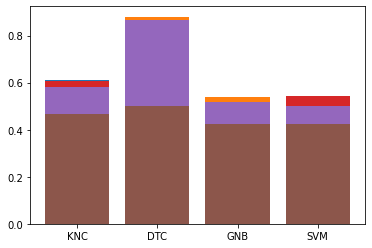

In [391]:
from cProfile import label
from turtle import color
import matplotlib.pyplot as plt



# for knc

# x = [ vals for vals in scores.values() ]

# df = pd.DataFrame(x)
# z = df.loc[0][0]
# f = df.loc[1][0]
# t = df.loc[2][0]
# X = [z,f,t]

# print(scores)

y = [
    [v[rs][i] for v in scores.values()]
    for i in [0,1]
    for rs in random_states
]

p = [ v for v in scores.values()]
print(f"{p=}")
x = [k for k in scores.keys()]

print(y)
for d in y:
    print(d)
    plt.bar(x,d)

# ax = plt.subplot(111)
# ax.bar(0, y[0], width=0.2, color='b', align='center')
# ax.bar(5, y[1], width=0.2, color='g', align='center')
# ax.bar(10, y[2], width=0.2, color='r', align='center')


# plt.legend(x)
# plt.ylabel("accuracy score")
# plt.xlabel("classifiers")
# plt.title("Accuracy vs. Classifiers graph")

